In [372]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [373]:
#read in the data
ny = pd.read_csv('./new_york.csv')
ny

indicator     group     state  \
0                        Symptoms of Depressive Disorder  By State  New York   
1                        Symptoms of Depressive Disorder  By State  New York   
2                        Symptoms of Depressive Disorder  By State  New York   
3                        Symptoms of Depressive Disorder  By State  New York   
4                        Symptoms of Depressive Disorder  By State  New York   
...                                                  ...       ...       ...   
35779  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35780  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35781  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35782  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35783  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   

       subgroup              phase  time_period time_period_label  \
0      New York                  1          1.0    Apr 23 - May 5   
1      New York                  1          1.0    Apr 23 - May 5   
2      New York                  1          1.0    Apr 23 - May 5   
3      New York                  1          1.0    Apr 23 - May 5   
4      New York                  1          1.0    Apr 23 - May 5   
...         ...                ...          ...               ...   
35779  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35780  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35781  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35782  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35783  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   

        time_period_start_date     time_period_end_date  value  ...  \
0      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
1      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
2      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
3      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
4      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
...                        ...                      ...    ...  ...   
35779  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35780  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35781  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35782  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35783  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   

       quartile_range                 age CASE_RATE HOSPITALIZED_RATE  \
0         24.1 - 28.7       18 - 29 years    171.46             13.55   
1         24.1 - 28.7       18 - 29 years   1554.45            153.69   
2         24.1 - 28.7       18 - 29 years   2529.03            630.34   
3         24.1 - 28.7       18 - 29 years   2552.64           1192.50   
4         24.1 - 28.7       18 - 29 years   2976.74           1830.07   
...               ...                 ...       ...               ...   
35779       28.8-37.6  80 years and above  20207.72           1160.60   
35780       28.8-37.6  80 years and above  15941.19           2540.10   
35781       28.8-37.6  80 years and above   7067.11           2418.35   
35782       28.8-37.6  80 years and above   7477.43           3995.12   
35783       28.8-37.6  80 years and above   6302.86            958.30   

      DEATH_RATE        date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  \
0           0.23  2020-04-23   90629.21686        19942.175032   6754.809134   
1          12.88  2020-04-23   90629.21686        19942.175032   6754.809134   
2         113.37  2020-04-23   90629.21686        19942.175032   6754.809134   
3         364.17  2020-04-23   90629.21686        19942.175032   6754.809134   
4         909.18  2020-04-23   90629.21686        19942.175032   6754.809134   
...          ...         ...           ...     

In [374]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']

ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               35784 non-null  object 
 1   phase                   35784 non-null  object 
 2   time_period             35784 non-null  float64
 3   time_period_start_date  35784 non-null  object 
 4   time_period_end_date    35784 non-null  object 
 5   value                   35784 non-null  float64
 6   lowci                   35784 non-null  float64
 7   highci                  35784 non-null  float64
 8   age                     35784 non-null  object 
 9   CASE_RATE               35784 non-null  float64
 10  HOSPITALIZED_RATE       35784 non-null  float64
 11  DEATH_RATE              33957 non-null  float64
 12  date                    35784 non-null  object 
 13  CASE_COUNT              35784 non-null  float64
 14  HOSPITALIZED_COUNT      35784 non-null

In [375]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
ny.isna().sum()

indicator                 0
phase                     0
time_period               0
time_period_start_date    0
time_period_end_date      0
value                     0
lowci                     0
highci                    0
age                       0
CASE_RATE                 0
HOSPITALIZED_RATE         0
DEATH_RATE                0
date                      0
CASE_COUNT                0
HOSPITALIZED_COUNT        0
DEATH_COUNT               0
counts                    0
dtype: int64

In [376]:
#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)

In [377]:
from sklearn import preprocessing

ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

"""def min_max_normalization(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

ny = min_max_normalization(data_to_use)"""
ny

indicator  phase  time_period   time_period_start_date  \
0            2.0    1.0          1.0  2020-04-23T00:00:00.000   
1            2.0    1.0          1.0  2020-04-23T00:00:00.000   
2            2.0    1.0          1.0  2020-04-23T00:00:00.000   
3            2.0    1.0          1.0  2020-04-23T00:00:00.000   
4            2.0    1.0          1.0  2020-04-23T00:00:00.000   
...          ...    ...          ...                      ...   
35779        3.0    5.0         23.0  2021-01-20T00:00:00.000   
35780        3.0    5.0         23.0  2021-01-20T00:00:00.000   
35781        3.0    5.0         23.0  2021-01-20T00:00:00.000   
35782        3.0    5.0         23.0  2021-01-20T00:00:00.000   
35783        3.0    5.0         23.0  2021-01-20T00:00:00.000   

          time_period_end_date  value  lowci  highci   age  CASE_RATE  \
0      2020-05-05T00:00:00.000   28.7   24.6    33.1  29.0     171.46   
1      2020-05-05T00:00:00.000   28.7   24.6    33.1  29.0    1554.45   
2      2020-05-05T00:00:00.000   28.7   24.6    33.1  29.0    2529.03   
3      2020-05-05T00:00:00.000   28.7   24.6    33.1  29.0    2552.64   
4      2020-05-05T00:00:00.000   28.7   24.6    33.1  29.0    2976.74   
...                        ...    ...    ...     ...   ...        ...   
35779  2021-02-01T00:00:00.000   35.8   32.0    39.7  80.0   20207.72   
35780  2021-02-01T00:00:00.000   35.8   32.0    39.7  80.0   15941.19   
35781  2021-02-01T00:00:00.000   35.8   32.0    39.7  80.0    7067.11   
35782  2021-02-01T00:00:00.000   35.8   32.0    39.7  80.0    7477.43   
35783  2021-02-01T00:00:00.000   35.8   32.0    39.7  80.0    6302.86   

       HOSPITALIZED_RATE  DEATH_RATE        date    CASE_COUNT  \
0                  13.55        0.23  2020-04-23   90629.21686   
1                 153.69       12.88  2020-04-23   90629.21686   
2                 630.34      113.37  2020-04-23   90629.21686   
3                1192.50      364.17  2020-04-23   90629.21686   
4                1830.07      909.18  2020-04-23   90629.21686   
...                  ...         ...         ...           ...   
35779            1160.60       67.68  2021-02-01  224684.00000   
35780            2540.10      476.51  2021-02-01  161559.00000   
35781            2418.35      756.82  2021-02-01   50798.00000   
35782            3995.12     1989.81  2021-02-01   41994.00000   
35783             958.30      266.66  2021-02-01  525458.00000   

       HOSPITALIZED_COUNT   DEATH_COUNT  twitter_count  
0            19942.175032   6754.809134       816268.0  
1            19942.175032   6754.809134       816268.0  
2            19942.175032   6754.809134       816268.0  
3            19942.175032   6754.809134       816268.0  
4            19942.175032   6754.809134       816268.0  
...                   ...           ...            ...  
35779        13326.000000    794.000000       188024.0  
35780        25652.000000   4800.000000       188024.0  
35781        17383.000000   5440.000000       188024.0  
35782        22437.000000  11175.000000       188024.0  
35783        79892.000000  22231.000000       188024.0  

[35784 rows x 17 columns]

In [378]:
ny = ny[['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','CASE_COUNT','HOSPITALIZED_COUNT','DEATH_COUNT','twitter_count','indicator']]
ny

phase  time_period  value  lowci  highci   age  CASE_RATE  \
0        1.0          1.0   28.7   24.6    33.1  29.0     171.46   
1        1.0          1.0   28.7   24.6    33.1  29.0    1554.45   
2        1.0          1.0   28.7   24.6    33.1  29.0    2529.03   
3        1.0          1.0   28.7   24.6    33.1  29.0    2552.64   
4        1.0          1.0   28.7   24.6    33.1  29.0    2976.74   
...      ...          ...    ...    ...     ...   ...        ...   
35779    5.0         23.0   35.8   32.0    39.7  80.0   20207.72   
35780    5.0         23.0   35.8   32.0    39.7  80.0   15941.19   
35781    5.0         23.0   35.8   32.0    39.7  80.0    7067.11   
35782    5.0         23.0   35.8   32.0    39.7  80.0    7477.43   
35783    5.0         23.0   35.8   32.0    39.7  80.0    6302.86   

       HOSPITALIZED_RATE  DEATH_RATE    CASE_COUNT  HOSPITALIZED_COUNT  \
0                  13.55        0.23   90629.21686        19942.175032   
1                 153.69       12.88   90629.21686        19942.175032   
2                 630.34      113.37   90629.21686        19942.175032   
3                1192.50      364.17   90629.21686        19942.175032   
4                1830.07      909.18   90629.21686        19942.175032   
...                  ...         ...           ...                 ...   
35779            1160.60       67.68  224684.00000        13326.000000   
35780            2540.10      476.51  161559.00000        25652.000000   
35781            2418.35      756.82   50798.00000        17383.000000   
35782            3995.12     1989.81   41994.00000        22437.000000   
35783             958.30      266.66  525458.00000        79892.000000   

        DEATH_COUNT  twitter_count  indicator  
0       6754.809134       816268.0        2.0  
1       6754.809134       816268.0        2.0  
2       6754.809134       816268.0        2.0  
3       6754.809134       816268.0        2.0  
4       6754.809134       816268.0        2.0  
...             ...            ...        ...  
35779    794.000000       188024.0        3.0  
35780   4800.000000       188024.0        3.0  
35781   5440.000000       188024.0        3.0  
35782  11175.000000       188024.0        3.0  
35783  22231.000000       188024.0        3.0  

[35784 rows x 14 columns]

In [379]:
names = ['Symptoms of Anxiety Disorder', 'Symptoms of Depression Disorder', 'Symptoms of Anxiety or Depression Disorder' ]
feature_names = ['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE', 'DEATH_RATE', 'CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'twitter_count']

In [380]:
dataset = ny.values
dataset

array([[1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        6.75480913e+03, 8.16268000e+05, 2.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        6.75480913e+03, 8.16268000e+05, 2.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 2.87000000e+01, ...,
        6.75480913e+03, 8.16268000e+05, 2.00000000e+00],
       ...,
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        5.44000000e+03, 1.88024000e+05, 3.00000000e+00],
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        1.11750000e+04, 1.88024000e+05, 3.00000000e+00],
       [5.00000000e+00, 2.30000000e+01, 3.58000000e+01, ...,
        2.22310000e+04, 1.88024000e+05, 3.00000000e+00]])

In [381]:
X = dataset[:, :-1]
y = dataset[:,-1]

In [382]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
y_scaled = min_max_scaler.fit_transform(y.reshape(-1, 1))
X = pd.DataFrame(x_scaled)
y = pd.DataFrame(y_scaled)

In [383]:
X

0    1         2         3         4    5         6         7   \
0      0.0  0.0  0.340102  0.294737  0.372642  0.0  0.000000  0.000000   
1      0.0  0.0  0.340102  0.294737  0.372642  0.0  0.069024  0.035197   
2      0.0  0.0  0.340102  0.294737  0.372642  0.0  0.117665  0.154911   
3      0.0  0.0  0.340102  0.294737  0.372642  0.0  0.118844  0.296102   
4      0.0  0.0  0.340102  0.294737  0.372642  0.0  0.140010  0.456232   
...    ...  ...       ...       ...       ...  ...       ...       ...   
35779  1.0  1.0  0.700508  0.684211  0.683962  1.0  1.000000  0.288090   
35780  1.0  1.0  0.700508  0.684211  0.683962  1.0  0.787060  0.634561   
35781  1.0  1.0  0.700508  0.684211  0.683962  1.0  0.344159  0.603983   
35782  1.0  1.0  0.700508  0.684211  0.683962  1.0  0.364637  1.000000   
35783  1.0  1.0  0.700508  0.684211  0.683962  1.0  0.306015  0.237281   

             8         9         10        11        12  
0      0.000000  0.164543  0.245592  0.303533  0.617050  
1      0.006358  0.164543  0.245592  0.303533  0.617050  
2      0.056866  0.164543  0.245592  0.303533  0.617050  
3      0.182923  0.164543  0.245592  0.303533  0.617050  
4      0.456855  0.164543  0.245592  0.303533  0.617050  
...         ...       ...       ...       ...       ...  
35779  0.033902  0.422109  0.162334  0.035282  0.054663  
35780  0.239387  0.300823  0.317444  0.215562  0.054663  
35781  0.380276  0.088013  0.213387  0.244363  0.054663  
35782  1.000000  0.071098  0.276986  0.502453  0.054663  
35783  0.133913  1.000000  1.000000  1.000000  0.054663  

[35784 rows x 13 columns]

In [384]:
y

0
0      0.5
1      0.5
2      0.5
3      0.5
4      0.5
...    ...
35779  1.0
35780  1.0
35781  1.0
35782  1.0
35783  1.0

[35784 rows x 1 columns]

In [385]:
# Helper

def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

In [386]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [387]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

Feature 0: 0.286601
Feature 1: 0.089414
Feature 2: 36075.900252
Feature 3: 41365.241769
Feature 4: 29433.792617
Feature 5: 0.397847
Feature 6: 0.004857
Feature 7: 0.823220
Feature 8: 0.631747
Feature 9: 0.409344
Feature 10: 0.906795
Feature 11: 0.953940
Feature 12: 0.102247


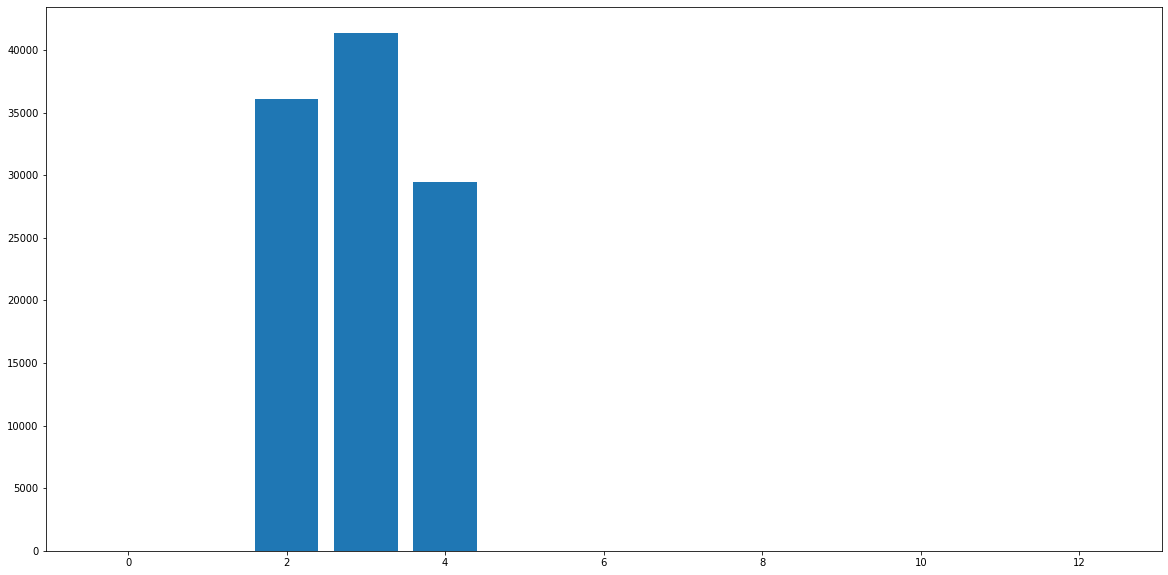

In [388]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
"""# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
"""
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.286601
Feature 1: 0.089414
Feature 2: 36075.900252
Feature 3: 41365.241769
Feature 4: 29433.792617
Feature 5: 0.397847
Feature 6: 0.004857
Feature 7: 0.823220
Feature 8: 0.631747
Feature 9: 0.409344
Feature 10: 0.906795
Feature 11: 0.953940
Feature 12: 0.102247


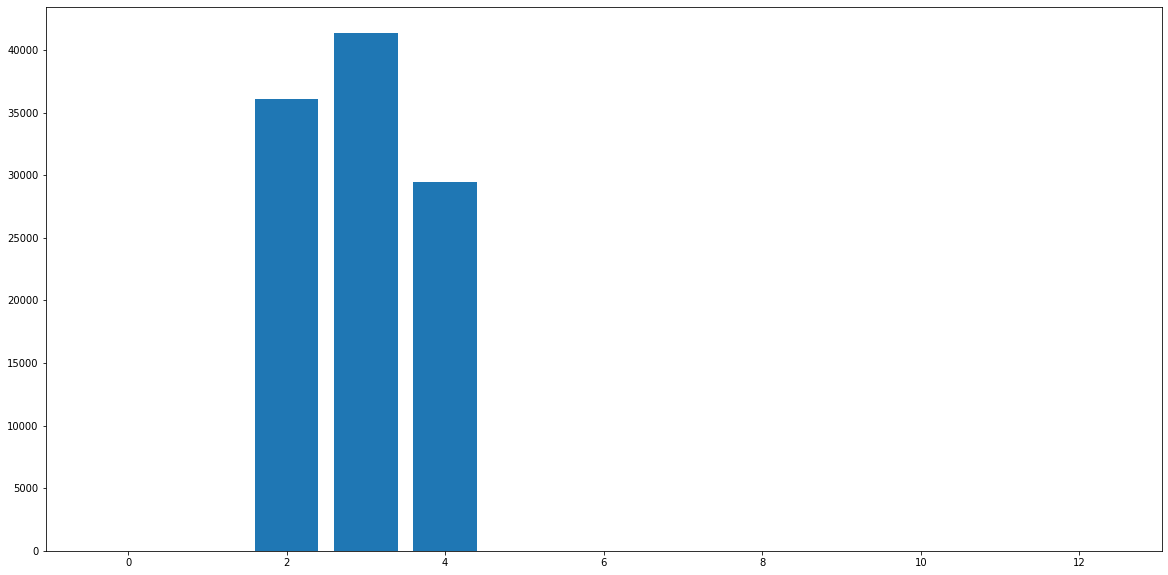

In [389]:
#feature selection 

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [390]:
#https://www.dezyre.com/recipes/select-features-using-best-anova-f-values-in-python

def ProjectPro_Ex_56():
    print()
    print('**How we can select features using best ANOVA F-values in Python**')

    # loading libraries
    from sklearn.datasets import load_iris
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif

    # Selecting Features With Best ANOVA F-Values
    # Creating an SelectKBest object to select features with two best ANOVA F-Values
    fvalue_Best = SelectKBest(f_classif, k='all')
    # Applying the SelectKBest object to the features and target
    X_kbest = fvalue_Best.fit_transform(X, y)
    print(X_kbest)

    # Showing results
    print('Original number of features:', X.shape)
    print('Reduced number of features:', X_kbest.shape)
    return X_kbest

result = ProjectPro_Ex_56()


**How we can select features using best ANOVA F-values in Python**
[[0.         0.         0.34010152 ... 0.24559151 0.30353311 0.61704964]
 [0.         0.         0.34010152 ... 0.24559151 0.30353311 0.61704964]
 [0.         0.         0.34010152 ... 0.24559151 0.30353311 0.61704964]
 ...
 [1.         1.         0.70050761 ... 0.21338686 0.24436344 0.05466282]
 [1.         1.         0.70050761 ... 0.27698638 0.50245263 0.05466282]
 [1.         1.         0.70050761 ... 1.         1.         0.05466282]]
Original number of features: (35784, 13)
Reduced number of features: (35784, 13)


In [391]:
#https://kgptalkie.com/feature-selection-based-on-univariate-anova-test-for-classification-machine-learning-kgp-talkie/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [393]:
X.shape, y.shape

((35784, 13), (35784, 1))

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1, stratify = y)

In [395]:
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [396]:
X_train_filter.shape, X_test_filter.shape

((17892, 13), (17892, 13))

In [397]:
X_train_T = X_train_filter.T
X_test_T = X_test_filter.T

In [398]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [399]:
X_train_T.duplicated().sum()

0

In [400]:
duplicated_features = X_train_T.duplicated()

In [401]:
features_to_keep = [not index for index in duplicated_features]
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [402]:
X_train_unique.shape, X_train.shape

((17892, 13), (17892, 13))

In [403]:
sel = f_classif(X_train_unique, y_train)
sel

(array([1.56579620e-01, 3.57054103e-01, 3.62278773e+04, 4.16040035e+04,
        2.95416375e+04, 9.41215062e-01, 5.21075844e-01, 3.27348209e-01,
        2.37387347e-01, 4.75595467e-02, 1.95450533e-01, 2.57441409e-01,
        8.76873384e-02]),
 array([0.85506461, 0.69973963, 0.        , 0.        , 0.        ,
        0.39017281, 0.59389029, 0.72083702, 0.78868822, 0.95355381,
        0.82246578, 0.77302978, 0.91604764]))

In [404]:
p_values = pd.Series(sel[1])
p_values.index = X_train_unique.columns
p_values.sort_values(ascending = True, inplace = True)

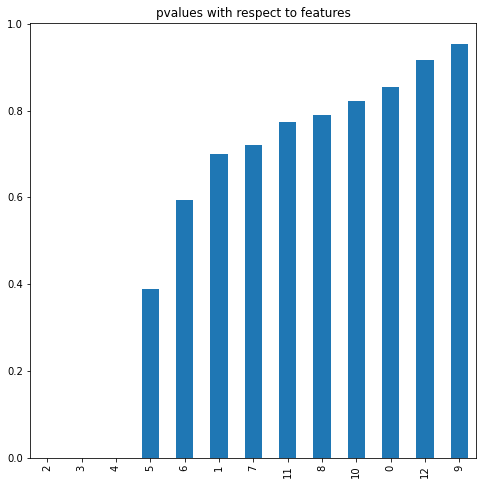

In [405]:
p_values.plot.bar(figsize = (8, 8))
plt.title('pvalues with respect to features')
plt.show()

In [406]:
p_values = p_values[p_values<0.05]

In [407]:
p_values.index

Int64Index([2, 3, 4], dtype='int64')

In [408]:
X_train_p = X_train_unique[p_values.index]
X_test_p = X_test_unique[p_values.index]

In [409]:
#https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/

# Create an SelectKBest object to select features with six best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=6)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 13
Reduced number of features: 6


# PCA Analysis Below

In [410]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [411]:
ny = pd.read_csv('./new_york.csv')
ny

indicator     group     state  \
0                        Symptoms of Depressive Disorder  By State  New York   
1                        Symptoms of Depressive Disorder  By State  New York   
2                        Symptoms of Depressive Disorder  By State  New York   
3                        Symptoms of Depressive Disorder  By State  New York   
4                        Symptoms of Depressive Disorder  By State  New York   
...                                                  ...       ...       ...   
35779  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35780  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35781  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35782  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   
35783  Symptoms of Anxiety Disorder or Depressive Dis...  By State  New York   

       subgroup              phase  time_period time_period_label  \
0      New York                  1          1.0    Apr 23 - May 5   
1      New York                  1          1.0    Apr 23 - May 5   
2      New York                  1          1.0    Apr 23 - May 5   
3      New York                  1          1.0    Apr 23 - May 5   
4      New York                  1          1.0    Apr 23 - May 5   
...         ...                ...          ...               ...   
35779  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35780  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35781  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35782  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   
35783  New York  3 (Jan 6 � Feb 1)         23.0    Jan 20 - Feb 1   

        time_period_start_date     time_period_end_date  value  ...  \
0      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
1      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
2      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
3      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
4      2020-04-23T00:00:00.000  2020-05-05T00:00:00.000   28.7  ...   
...                        ...                      ...    ...  ...   
35779  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35780  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35781  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35782  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   
35783  2021-01-20T00:00:00.000  2021-02-01T00:00:00.000   35.8  ...   

       quartile_range                 age CASE_RATE HOSPITALIZED_RATE  \
0         24.1 - 28.7       18 - 29 years    171.46             13.55   
1         24.1 - 28.7       18 - 29 years   1554.45            153.69   
2         24.1 - 28.7       18 - 29 years   2529.03            630.34   
3         24.1 - 28.7       18 - 29 years   2552.64           1192.50   
4         24.1 - 28.7       18 - 29 years   2976.74           1830.07   
...               ...                 ...       ...               ...   
35779       28.8-37.6  80 years and above  20207.72           1160.60   
35780       28.8-37.6  80 years and above  15941.19           2540.10   
35781       28.8-37.6  80 years and above   7067.11           2418.35   
35782       28.8-37.6  80 years and above   7477.43           3995.12   
35783       28.8-37.6  80 years and above   6302.86            958.30   

      DEATH_RATE        date    CASE_COUNT  HOSPITALIZED_COUNT   DEATH_COUNT  \
0           0.23  2020-04-23   90629.21686        19942.175032   6754.809134   
1          12.88  2020-04-23   90629.21686        19942.175032   6754.809134   
2         113.37  2020-04-23   90629.21686        19942.175032   6754.809134   
3         364.17  2020-04-23   90629.21686        19942.175032   6754.809134   
4         909.18  2020-04-23   90629.21686        19942.175032   6754.809134   
...          ...         ...           ...     

In [412]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "1", "Symptoms of Depressive Disorder": "2", "Symptoms of Anxiety Disorder or Depressive Disorder": "3"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']

ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               35784 non-null  object 
 1   phase                   35784 non-null  object 
 2   time_period             35784 non-null  float64
 3   time_period_start_date  35784 non-null  object 
 4   time_period_end_date    35784 non-null  object 
 5   value                   35784 non-null  float64
 6   lowci                   35784 non-null  float64
 7   highci                  35784 non-null  float64
 8   age                     35784 non-null  object 
 9   CASE_RATE               35784 non-null  float64
 10  HOSPITALIZED_RATE       35784 non-null  float64
 11  DEATH_RATE              33957 non-null  float64
 12  date                    35784 non-null  object 
 13  CASE_COUNT              35784 non-null  float64
 14  HOSPITALIZED_COUNT      35784 non-null

In [413]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)

from sklearn import preprocessing

ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

In [414]:
ny = ny[['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','CASE_COUNT','HOSPITALIZED_COUNT','DEATH_COUNT','twitter_count','indicator']]
ny

phase  time_period  value  lowci  highci   age  CASE_RATE  \
0        1.0          1.0   28.7   24.6    33.1  29.0     171.46   
1        1.0          1.0   28.7   24.6    33.1  29.0    1554.45   
2        1.0          1.0   28.7   24.6    33.1  29.0    2529.03   
3        1.0          1.0   28.7   24.6    33.1  29.0    2552.64   
4        1.0          1.0   28.7   24.6    33.1  29.0    2976.74   
...      ...          ...    ...    ...     ...   ...        ...   
35779    5.0         23.0   35.8   32.0    39.7  80.0   20207.72   
35780    5.0         23.0   35.8   32.0    39.7  80.0   15941.19   
35781    5.0         23.0   35.8   32.0    39.7  80.0    7067.11   
35782    5.0         23.0   35.8   32.0    39.7  80.0    7477.43   
35783    5.0         23.0   35.8   32.0    39.7  80.0    6302.86   

       HOSPITALIZED_RATE  DEATH_RATE    CASE_COUNT  HOSPITALIZED_COUNT  \
0                  13.55        0.23   90629.21686        19942.175032   
1                 153.69       12.88   90629.21686        19942.175032   
2                 630.34      113.37   90629.21686        19942.175032   
3                1192.50      364.17   90629.21686        19942.175032   
4                1830.07      909.18   90629.21686        19942.175032   
...                  ...         ...           ...                 ...   
35779            1160.60       67.68  224684.00000        13326.000000   
35780            2540.10      476.51  161559.00000        25652.000000   
35781            2418.35      756.82   50798.00000        17383.000000   
35782            3995.12     1989.81   41994.00000        22437.000000   
35783             958.30      266.66  525458.00000        79892.000000   

        DEATH_COUNT  twitter_count  indicator  
0       6754.809134       816268.0        2.0  
1       6754.809134       816268.0        2.0  
2       6754.809134       816268.0        2.0  
3       6754.809134       816268.0        2.0  
4       6754.809134       816268.0        2.0  
...             ...            ...        ...  
35779    794.000000       188024.0        3.0  
35780   4800.000000       188024.0        3.0  
35781   5440.000000       188024.0        3.0  
35782  11175.000000       188024.0        3.0  
35783  22231.000000       188024.0        3.0  

[35784 rows x 14 columns]

In [415]:
values = ny.values
 
Y = values[:,13]
X = values[:,0:12]

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

min_max_scaler = preprocessing.MinMaxScaler()
#x = StandardScaler().fit_transform(x)
x_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(x_scaled)

In [416]:
X

0         1         2         3         4         5         6   \
0     -1.046623 -2.028335 -0.519765 -0.617653 -0.412523 -1.574064 -1.255775   
1     -1.046623 -2.028335 -0.519765 -0.617653 -0.412523 -1.574064 -0.837174   
2     -1.046623 -2.028335 -0.519765 -0.617653 -0.412523 -1.574064 -0.542190   
3     -1.046623 -2.028335 -0.519765 -0.617653 -0.412523 -1.574064 -0.535043   
4     -1.046623 -2.028335 -0.519765 -0.617653 -0.412523 -1.574064 -0.406678   
...         ...       ...       ...       ...       ...       ...       ...   
35779  1.655567  1.392188  0.725645  0.752476  0.685975  1.221661  4.808764   
35780  1.655567  1.392188  0.725645  0.752476  0.685975  1.221661  3.517378   
35781  1.655567  1.392188  0.725645  0.752476  0.685975  1.221661  0.831388   
35782  1.655567  1.392188  0.725645  0.752476  0.685975  1.221661  0.955583   
35783  1.655567  1.392188  0.725645  0.752476  0.685975  1.221661  0.600066   

             7         8             9             10            11  
0     -1.196508 -0.878629 -3.168163e-16  4.000775e-16  1.509427e-16  
1     -1.056190 -0.856327 -3.168163e-16  4.000775e-16  1.509427e-16  
2     -0.578936 -0.679167 -3.168163e-16  4.000775e-16  1.509427e-16  
3     -0.016063 -0.237016 -3.168163e-16  4.000775e-16  1.509427e-16  
4      0.622315  0.723818 -3.168163e-16  4.000775e-16  1.509427e-16  
...         ...       ...           ...           ...           ...  
35779 -0.048004 -0.759717  1.459284e+00 -3.637985e-01 -9.892751e-01  
35780  1.333245 -0.038964  7.721221e-01  3.139617e-01 -3.244264e-01  
35781  1.211341  0.455212 -4.335917e-01 -1.407194e-01 -2.182100e-01  
35782  2.790110  2.628930 -5.294296e-01  1.371810e-01  7.335892e-01  
35783 -0.250560 -0.408922  4.733427e+00  3.296415e+00  2.568479e+00  

[35784 rows x 12 columns]

In [417]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [418]:
finalDf = pd.concat([principalDf, ny[['indicator']]], axis = 1)

In [419]:
finalDf

PC1       PC2  indicator
0     -2.285382 -0.502772        2.0
1     -2.142841 -0.417350        2.0
2     -1.952059 -0.305039        2.0
3     -1.789469 -0.213121        2.0
4     -1.512610 -0.059108        2.0
...         ...       ...        ...
35779  3.101728  0.638976        3.0
35780  3.237677  0.890637        3.0
35781  2.207202 -0.126297        3.0
35782  3.063655  0.646637        3.0
35783  4.269089  4.000753        3.0

[35784 rows x 3 columns]

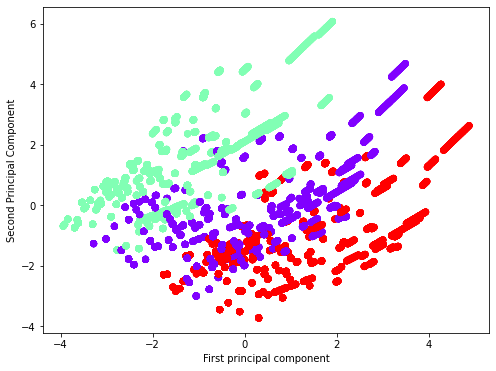

In [420]:
plt.figure(figsize=(8,6))
targets = ['Anxiety', 'Depression', 'Anxiety or Depression']
plt.scatter(finalDf.iloc[:,0],finalDf.iloc[:,1],
            c=finalDf['indicator'],
            cmap='rainbow'
           )
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
pass;

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

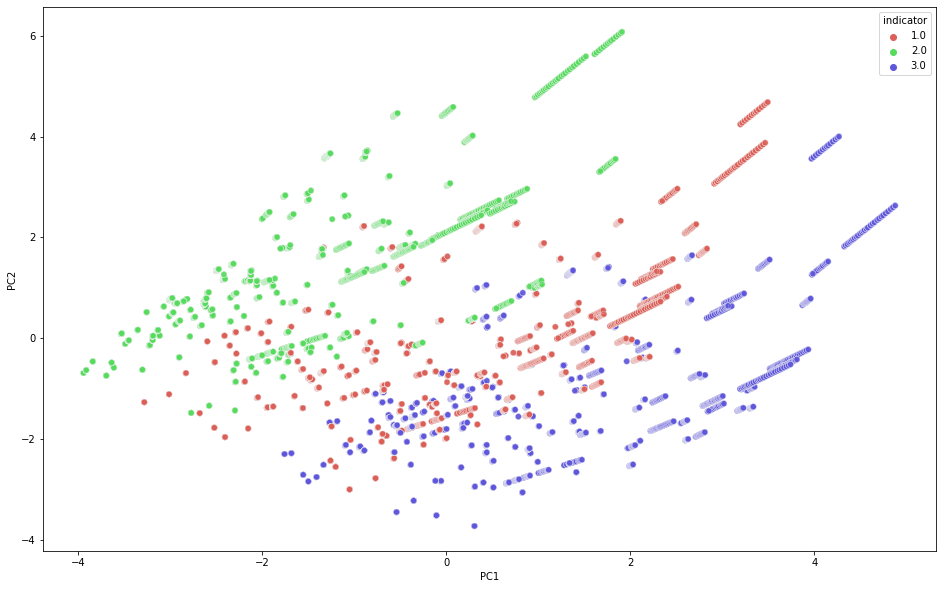

In [421]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="indicator",
    palette=sns.color_palette("hls", 3),
    data=finalDf,
    legend="full",
    alpha=0.3
)

In [422]:
pca.explained_variance_ratio_

array([0.26713145, 0.23087349])

In [423]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA()
components = pca.fit_transform(ny[feature_names])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=ny["indicator"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [424]:
values = finalDf.values
 
Y = values[:,-1]
X = values[:,0:1]
Y

array([2., 2., 2., ..., 3., 3., 3.])

In [425]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [426]:
finalDf

PC1       PC2  indicator
0     -2.285382 -0.502772        2.0
1     -2.142841 -0.417350        2.0
2     -1.952059 -0.305039        2.0
3     -1.789469 -0.213121        2.0
4     -1.512610 -0.059108        2.0
...         ...       ...        ...
35779  3.101728  0.638976        3.0
35780  3.237677  0.890637        3.0
35781  2.207202 -0.126297        3.0
35782  3.063655  0.646637        3.0
35783  4.269089  4.000753        3.0

[35784 rows x 3 columns]

In [427]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

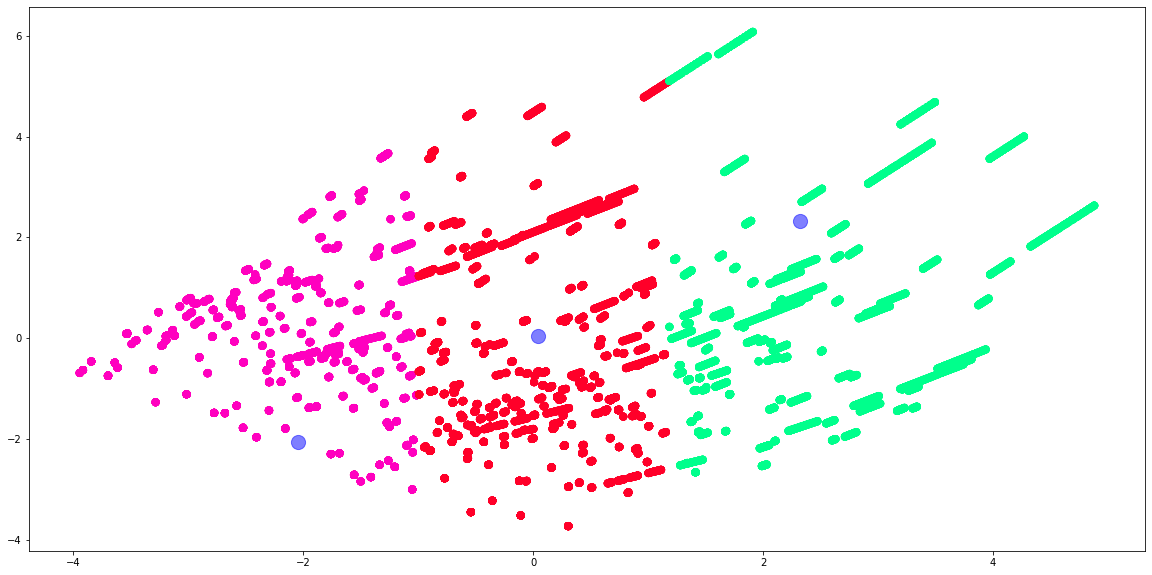

In [428]:
plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], c=y_kmeans, s=50, cmap='gist_rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, -1], c='blue', s=200, alpha=0.5);

In [429]:
from sklearn.metrics import silhouette_score, silhouette_samples
range_n_clusters = range(2,12)
coordinates = finalDf[['PC1', 'PC2']].values

for k in range_n_clusters:
    cluster_model = KMeans(n_clusters=k)
    cluster_labels = cluster_model.fit_predict(coordinates)
    silhouette_avg = silhouette_score(coordinates, cluster_labels)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 2 The average silhouette_score is : 0.37426424684355625
For k = 3 The average silhouette_score is : 0.390451490824595
For k = 4 The average silhouette_score is : 0.39245959373160244
For k = 5 The average silhouette_score is : 0.3776114821609182
For k = 6 The average silhouette_score is : 0.3775888924704478
For k = 7 The average silhouette_score is : 0.37981853088499823
For k = 8 The average silhouette_score is : 0.3871643564956204
For k = 9 The average silhouette_score is : 0.37866063897853286
For k = 10 The average silhouette_score is : 0.38632361241214275
For k = 11 The average silhouette_score is : 0.39217488261512523


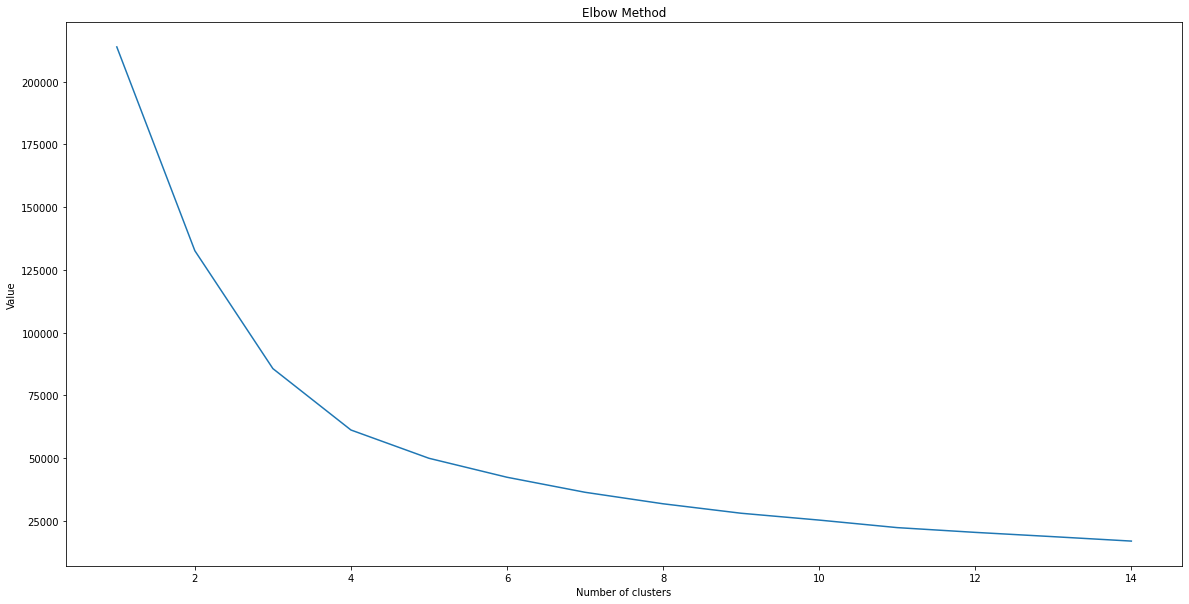

In [430]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(coordinates)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Value')
plt.show()

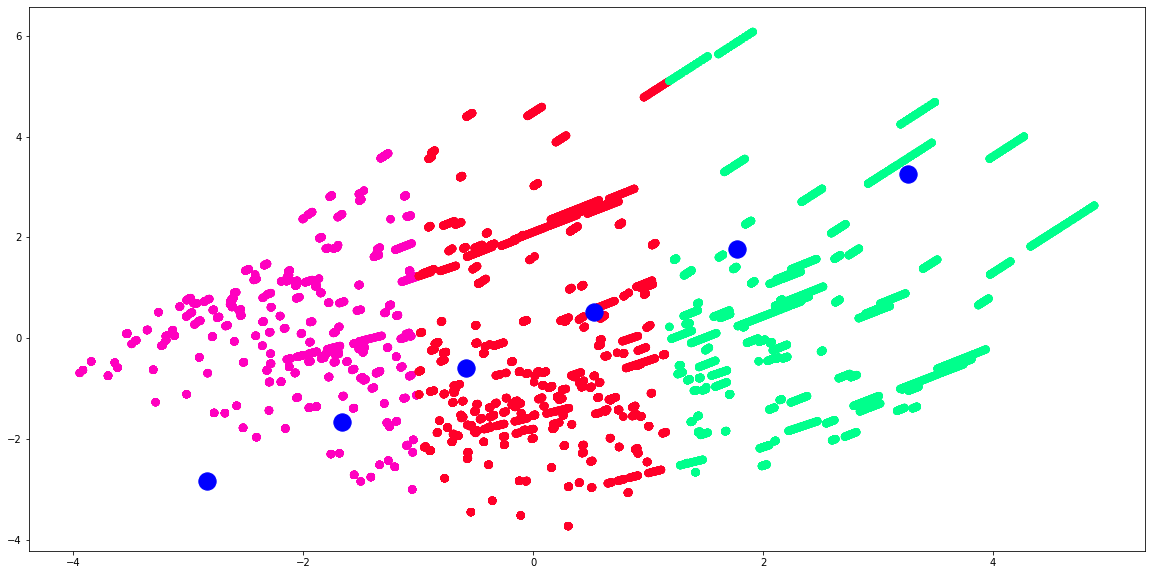

In [431]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], c=y_kmeans, s=50, cmap='gist_rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s=300, c='blue')
plt.show()

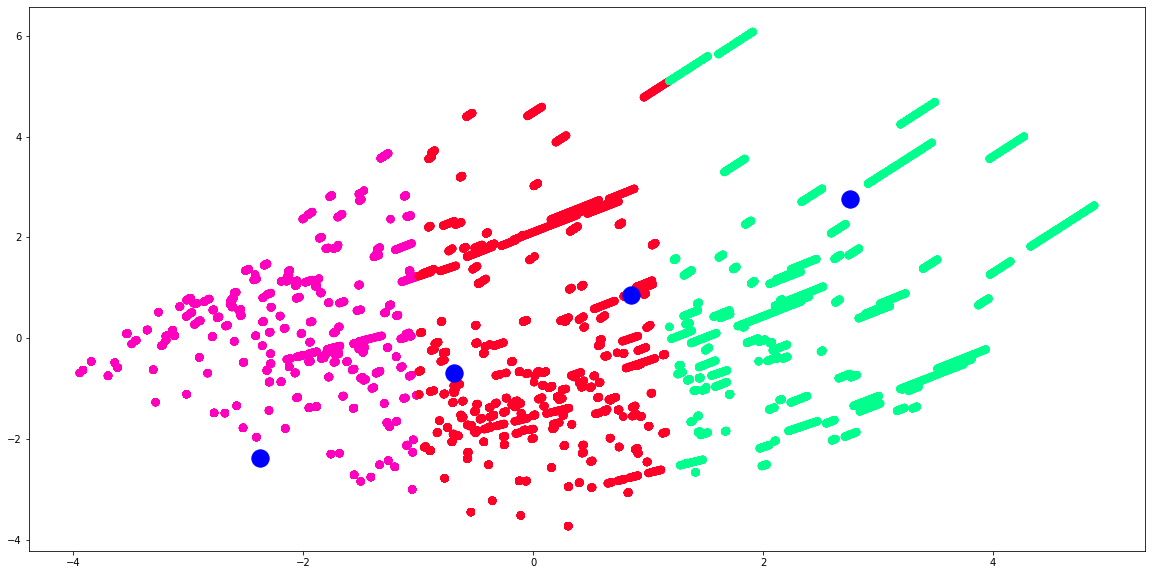

In [432]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(finalDf.iloc[:,0], finalDf.iloc[:,1], c=y_kmeans, s=50, cmap='gist_rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s=300, c='blue')
plt.show()

In [433]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [435]:
df = finalDf
#df = df[:,0:1]
del df['indicator']

In [436]:
df

PC1       PC2
0     -2.285382 -0.502772
1     -2.142841 -0.417350
2     -1.952059 -0.305039
3     -1.789469 -0.213121
4     -1.512610 -0.059108
...         ...       ...
35779  3.101728  0.638976
35780  3.237677  0.890637
35781  2.207202 -0.126297
35782  3.063655  0.646637
35783  4.269089  4.000753

[35784 rows x 2 columns]

In [437]:
#Creating the model
 
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
 
#predicting the labels
 
labels = agg_clustering.fit_predict(df.values)

In [438]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

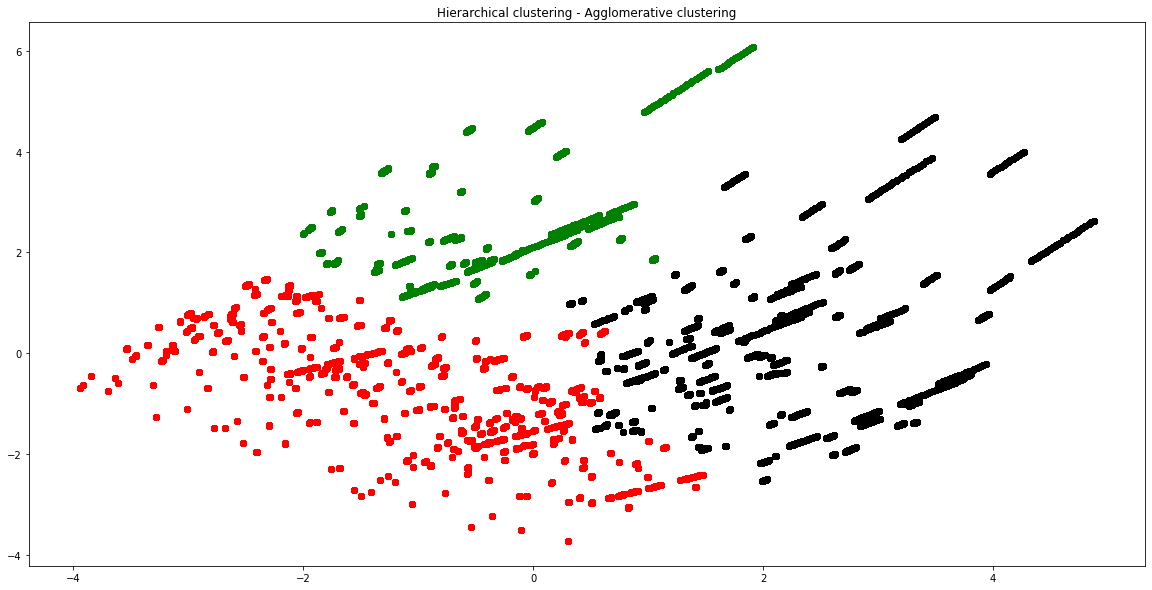

In [439]:
#filter rows of original data
filtered_label0 = df[labels == 0]
filtered_label1 = df[labels == 1]
filtered_label2 = df[labels == 2]
 
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'green')
plt.title("Hierarchical clustering - Agglomerative clustering")
plt.show()

In [446]:
len(labels)

35784

In [440]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage

In [441]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

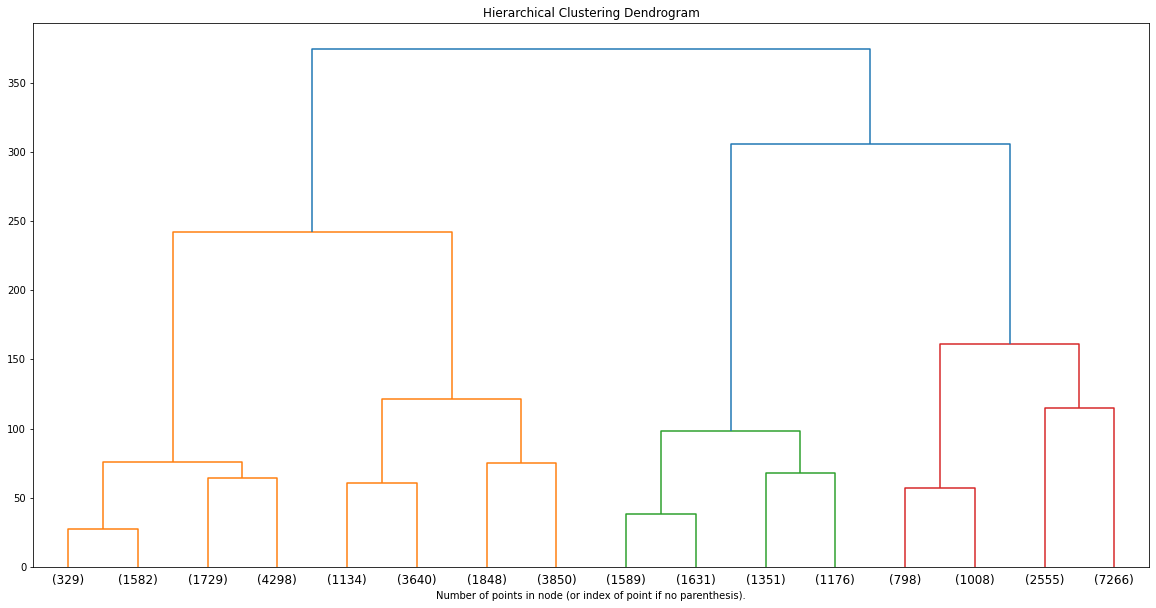

In [442]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [443]:
Z = linkage(df, method = 'ward')
 
"""#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()"""

"#plotting dendrogram\ndendro = dendrogram(Z)\nplt.title('Dendrogram')\nplt.ylabel('Euclidean distance')\nplt.show()"

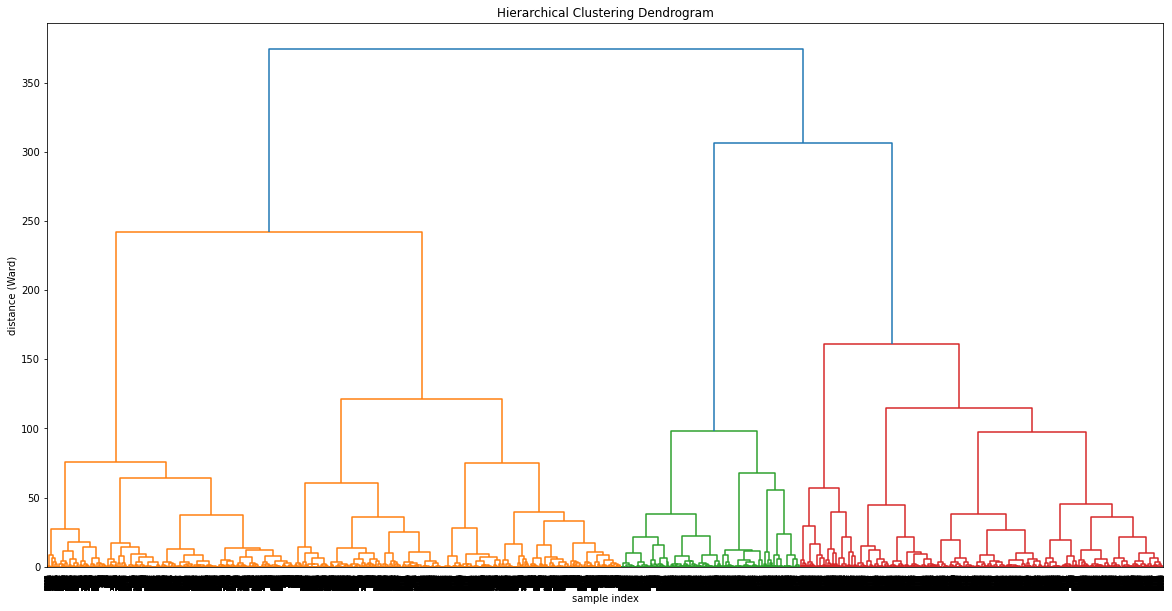

In [444]:
plt.title('Hierarchical Clustering Dendrogram')

# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')

# Make the dendrogram
dendrogram(Z, labels=df.index, leaf_rotation=90)

# Show the graph
plt.show()